Hola :)

Soy plenamente consciente de que la práctica contiene lo mismo para el Apto. Pero gracias a tus clases estoy implementando mlflow y fastapi en la plataforma de IA de la empresa en la que estoy. No he podido dedicar más tiempo para que queden reflejados los conocimientos en la práctica, pero quería agradecerte lo que me has aportado.

Un saludo!

# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [41]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [43]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [44]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df.shape

(150, 5)

In [46]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [47]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [49]:
train, test = train_test_split(df, test_size=0.2)

In [50]:
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

In [51]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

In [52]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

In [53]:
clf = KNeighborsClassifier(n_neighbors=5)

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('KNeighborsClassifier', clf)])

In [54]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9],
    'KNeighborsClassifier__weights': ['uniform', 'distance'],
    'KNeighborsClassifier__p': [1, 2]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Mejor combinación de hiperparámetros:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

# Usar el mejor modelo para predecir
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

# Métricas adicionales
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

precision, recall, f1, conf_matrix, class_report

Mejor combinación de hiperparámetros: {'KNeighborsClassifier__n_neighbors': 5, 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__weights': 'uniform'}
Mejor score de validación: 0.9478947368421051


(0.9625,
 0.9583333333333334,
 0.9580409356725146,
 array([[7, 0, 0],
        [0, 7, 1],
        [0, 0, 9]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      0.88      0.93         8\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.96        24\n   macro avg       0.97      0.96      0.96        24\nweighted avg       0.96      0.96      0.96        24\n')

In [58]:
model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones sobre el set de test
y_pred = model.predict(x_test)

# Métricas adicionales
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

precision, recall, f1, conf_matrix, class_report

(0.9625,
 0.9583333333333334,
 0.9580409356725146,
 array([[7, 0, 0],
        [0, 7, 1],
        [0, 0, 9]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      0.88      0.93         8\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.96        24\n   macro avg       0.97      0.96      0.96        24\nweighted avg       0.96      0.96      0.96        24\n')

In [61]:
mlflow.set_experiment("iris-ia3")
with mlflow.start_run(run_name="Iris-GridSearchCV"):
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_param("n_neighbors", best_model.named_steps['KNeighborsClassifier'].n_neighbors)
    mlflow.log_param("weights", best_model.named_steps['KNeighborsClassifier'].weights)
    mlflow.log_param("p", best_model.named_steps['KNeighborsClassifier'].p)
    mlflow.sklearn.log_model(best_model, "iris_knn_grid")

2025/06/14 20:29:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


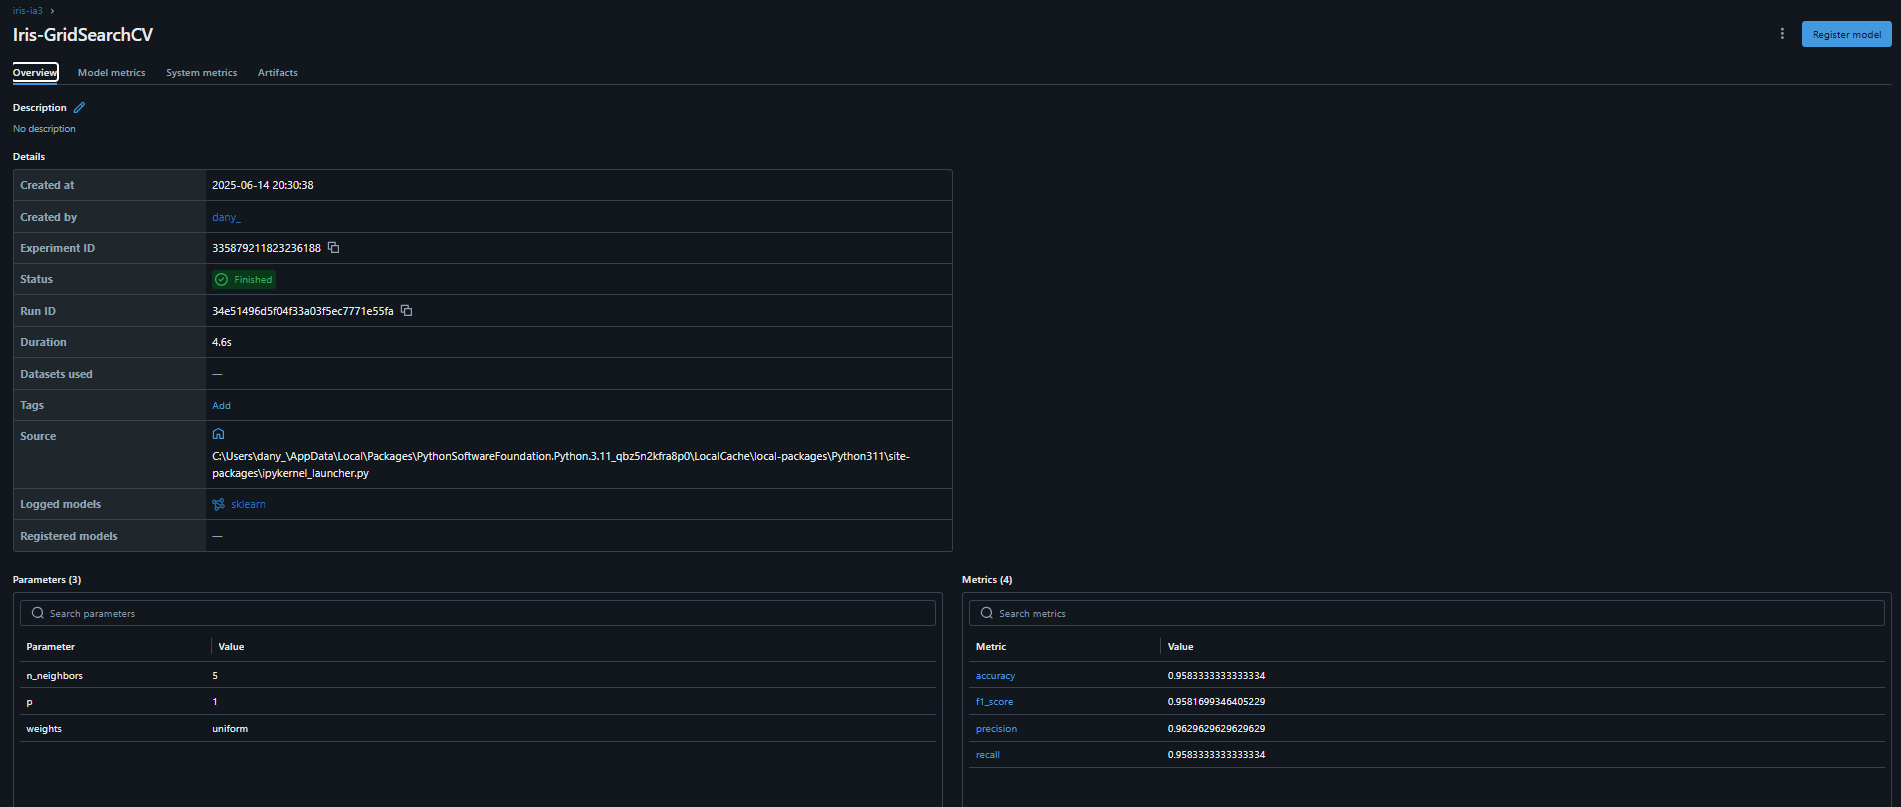
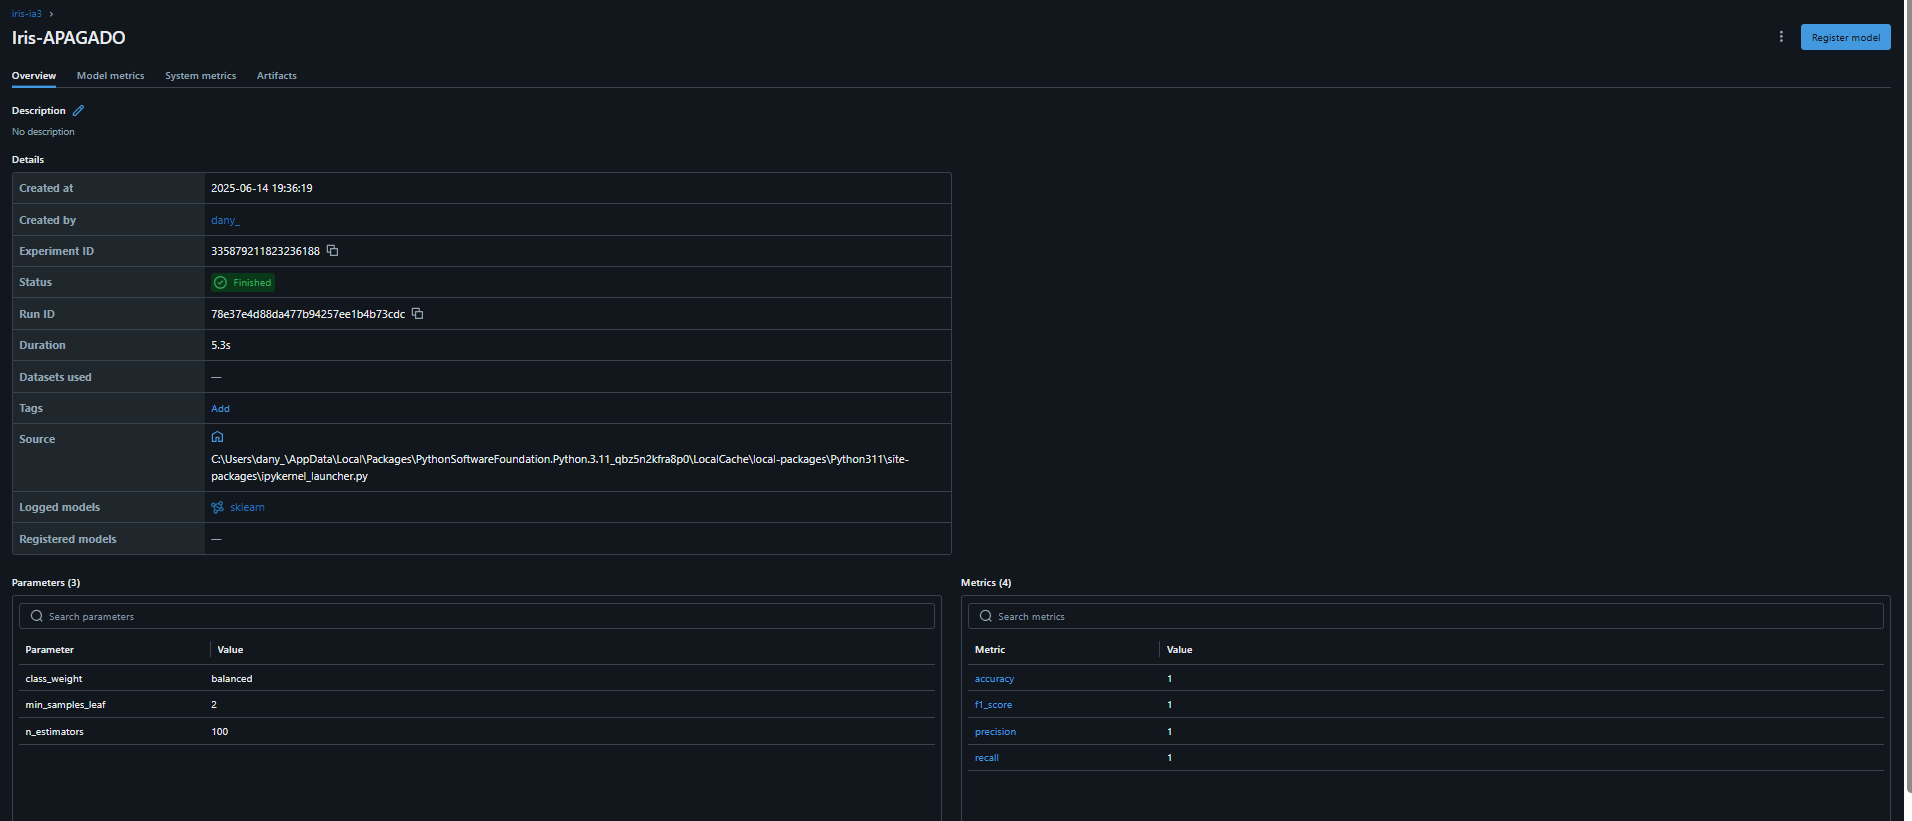

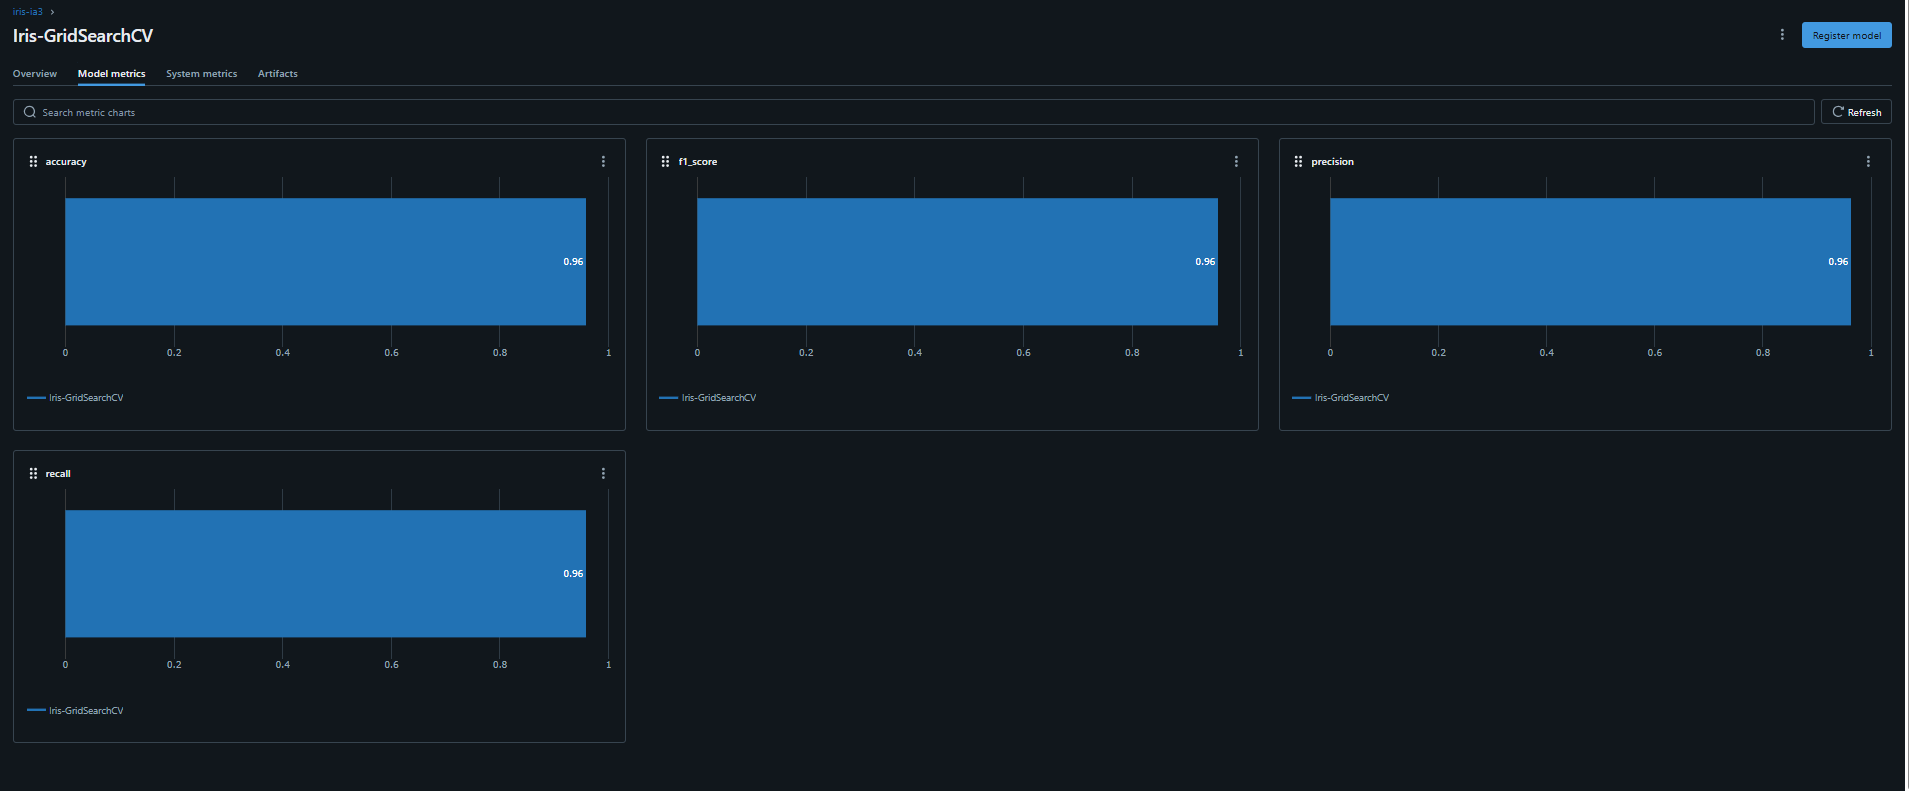
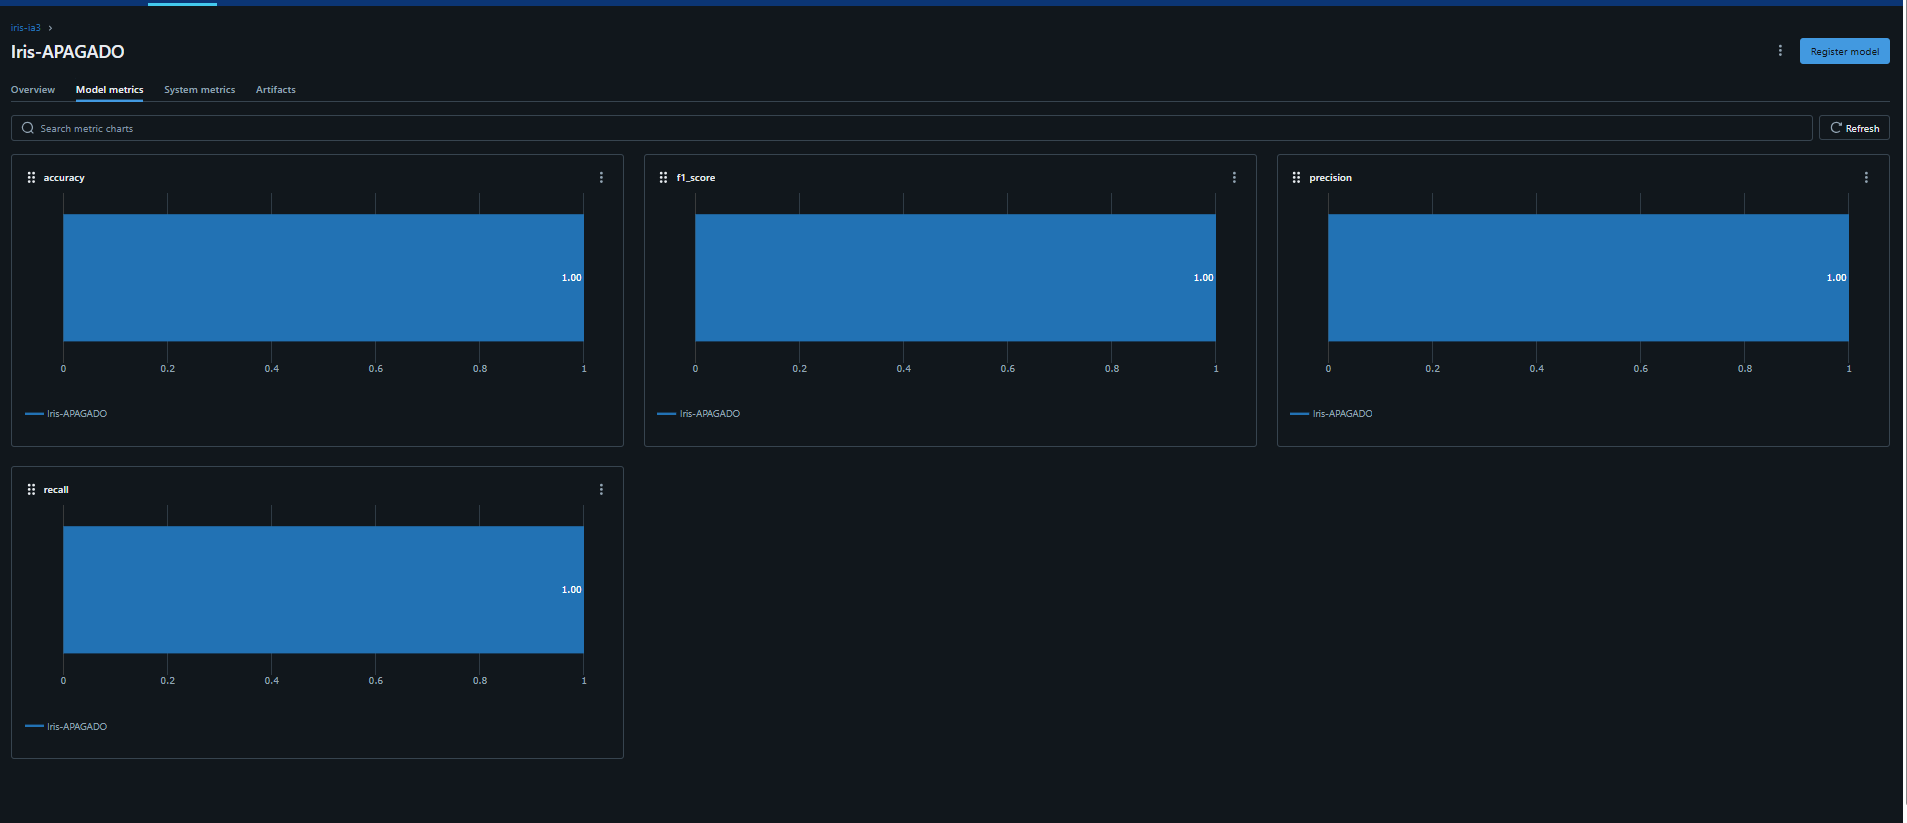

## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [63]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

def load_and_prepare_data(test_size=0.2, random_state=123):
    iris = load_iris()
    df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
    df['target'] = iris['target']
    train, test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['target'])
    features = [x for x in list(train.columns) if x != 'target']
    x_raw = train[features]
    y_raw = train['target']
    x_train, x_test, y_train, y_test = train_test_split(
        x_raw, y_raw, test_size=0.20, random_state=random_state, stratify=y_raw
    )
    return x_train, x_test, y_train, y_test, test

def build_model(n_neighbors=5):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('KNeighborsClassifier', clf)
    ])
    return model, clf

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return precision, recall, f1, acc, conf_matrix, class_report

def log_with_mlflow(model, clf, precision, recall, f1, acc):
    mlflow.set_experiment("iris-ia3")
    with mlflow.start_run(run_name="Iris-APAGADO"):
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_param("n_neighbors", clf.n_neighbors)
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="iris",
            registered_model_name=None,
            signature=None,
            input_example=None,
            metadata={
                "n_neighbors": clf.n_neighbors
            }
        )

def main(test_size=0.2, random_state=123):
    x_train, x_test, y_train, y_test, test = load_and_prepare_data(test_size, random_state)
    model, clf = build_model()
    model.fit(x_train, y_train)

    # GridSearchCV para encontrar el mejor modelo
    from sklearn.model_selection import GridSearchCV
    param_grid = {
        'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9],
        'KNeighborsClassifier__weights': ['uniform', 'distance'],
        'KNeighborsClassifier__p': [1, 2]
    }
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(x_train, y_train)
    print("Mejor combinación de hiperparámetros:", grid.best_params_)
    print("Mejor score de validación:", grid.best_score_)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    # Logging de MLflow para el mejor modelo
    mlflow.set_experiment("iris-ia3")
    with mlflow.start_run(run_name="Iris-GridSearchCV"):
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_param("n_neighbors", best_model.named_steps['KNeighborsClassifier'].n_neighbors)
        mlflow.log_param("weights", best_model.named_steps['KNeighborsClassifier'].weights)
        mlflow.log_param("p", best_model.named_steps['KNeighborsClassifier'].p)
        mlflow.sklearn.log_model(best_model, "iris_knn_grid")

    # Guardar test set para uso posterior
    test_target = test['target']
    test[['target']].to_csv('test-target.csv', index=False)
    test_features = test.drop(columns=['target'])
    test_features.to_csv('test.csv', index=False)

if __name__ == "__main__":
    main()

Mejor combinación de hiperparámetros: {'KNeighborsClassifier__n_neighbors': 5, 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__weights': 'uniform'}
Mejor score de validación: 0.9894736842105264
Precision: 0.9629629629629629
Recall: 0.9583333333333334
F1 Score: 0.9581699346405229
Accuracy: 0.9583333333333334
Confusion Matrix:
 [[8 0 0]
 [0 8 0]
 [0 1 7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.93         8

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



2025/06/14 20:30:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

In [ ]:
from fastapi import FastAPI
from transformers import pipeline
import random
import datetime

app = FastAPI()

# Endpoint 1: Devuelve un número aleatorio entre min y max
@app.get("/random")
def random_number(min: int = 0, max: int = 100):
    return {"random_number": random.randint(min, max)}

# Endpoint 2: Devuelve la fecha y hora actual en ISO format
@app.get("/datetime")
def current_datetime():
    now = datetime.datetime.now()
    return {"datetime": now.isoformat()}

# Endpoint 3: Devuelve si un número es primo o no
@app.get("/is-prime")
def is_prime(n: int):
    if n < 2:
        return {"number": n, "is_prime": False}
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return {"number": n, "is_prime": False}
    return {"number": n, "is_prime": True}

# Endpoint 4: HuggingFace Sentiment Analysis
sentiment_pipe = pipeline("sentiment-analysis")
@app.get("/sentiment")
def sentiment(text: str):
    return sentiment_pipe(text)

# Endpoint 5: HuggingFace Zero-shot Classification
zero_shot_pipe = pipeline("zero-shot-classification")
@app.get("/zero-shot")
def zero_shot(text: str, labels: str):
    labels_list = labels.split(",")
    return zero_shot_pipe(text, candidate_labels=labels_list)

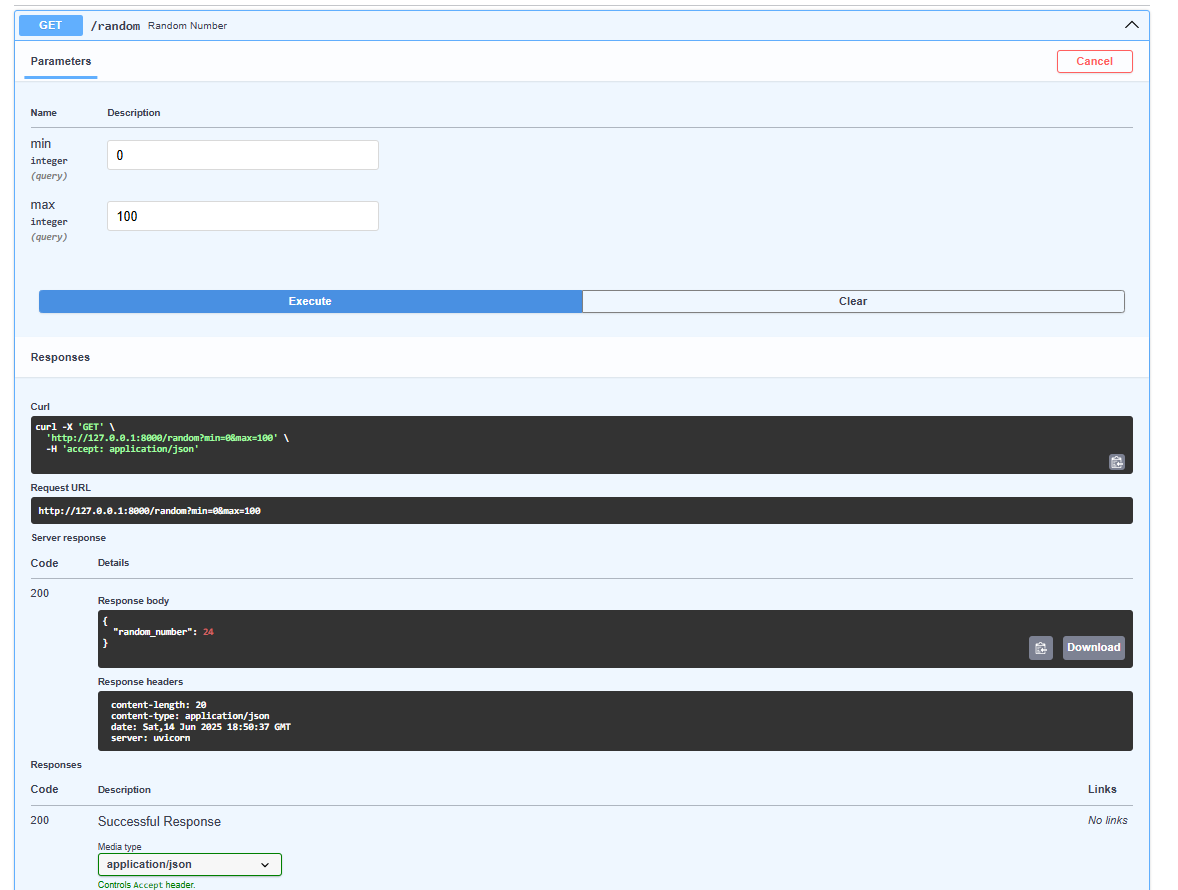

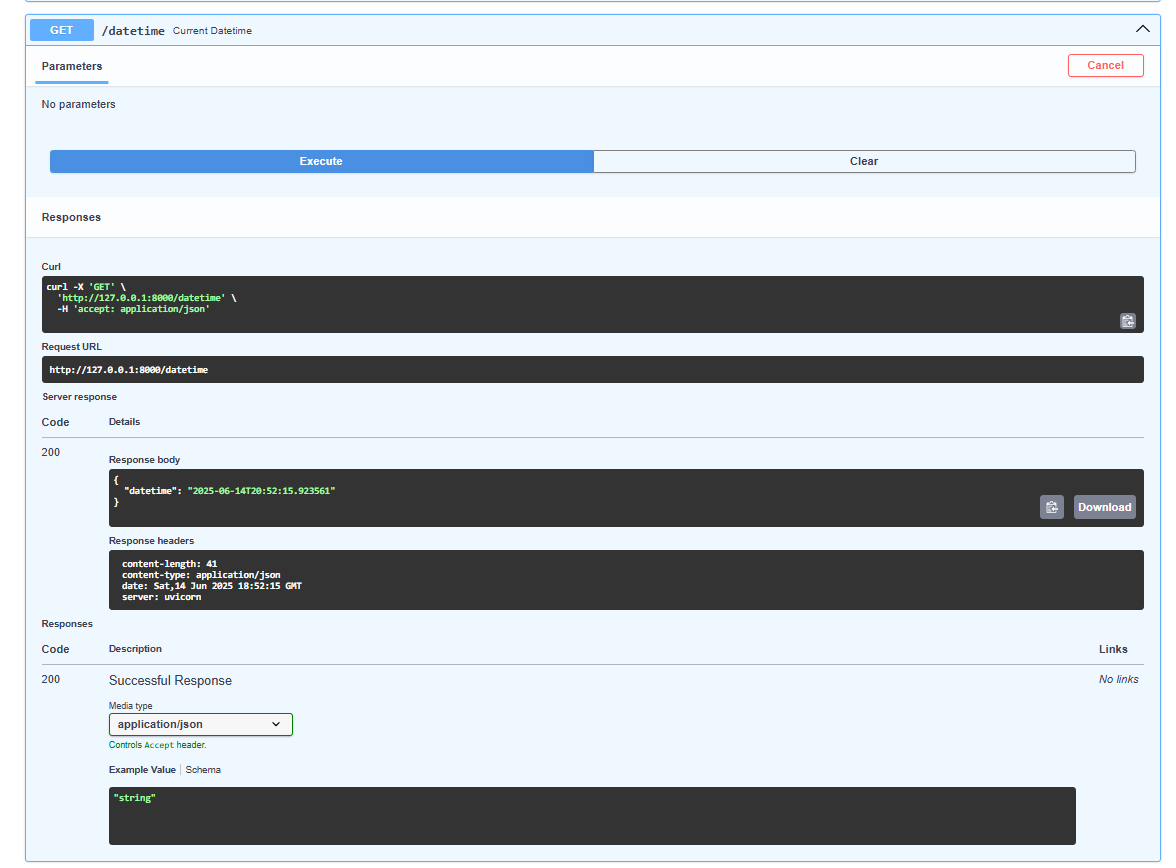

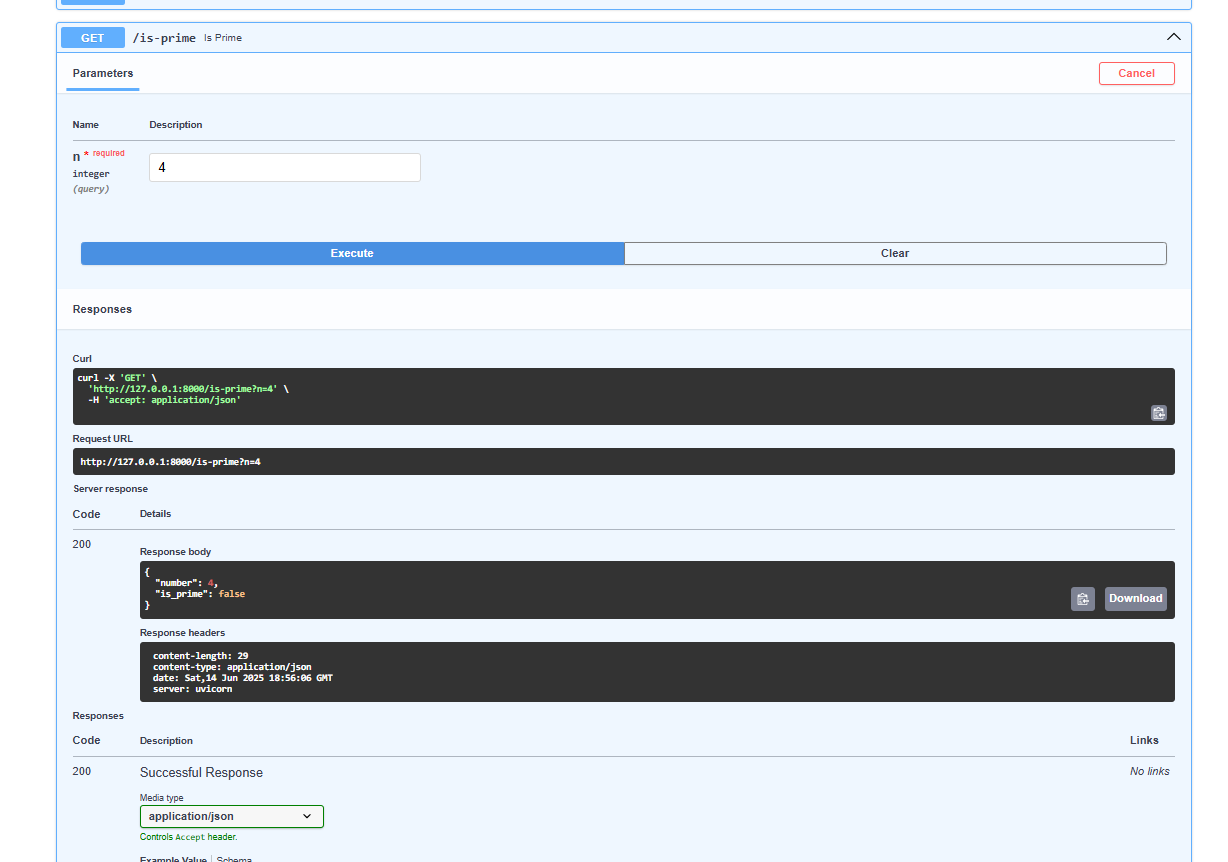

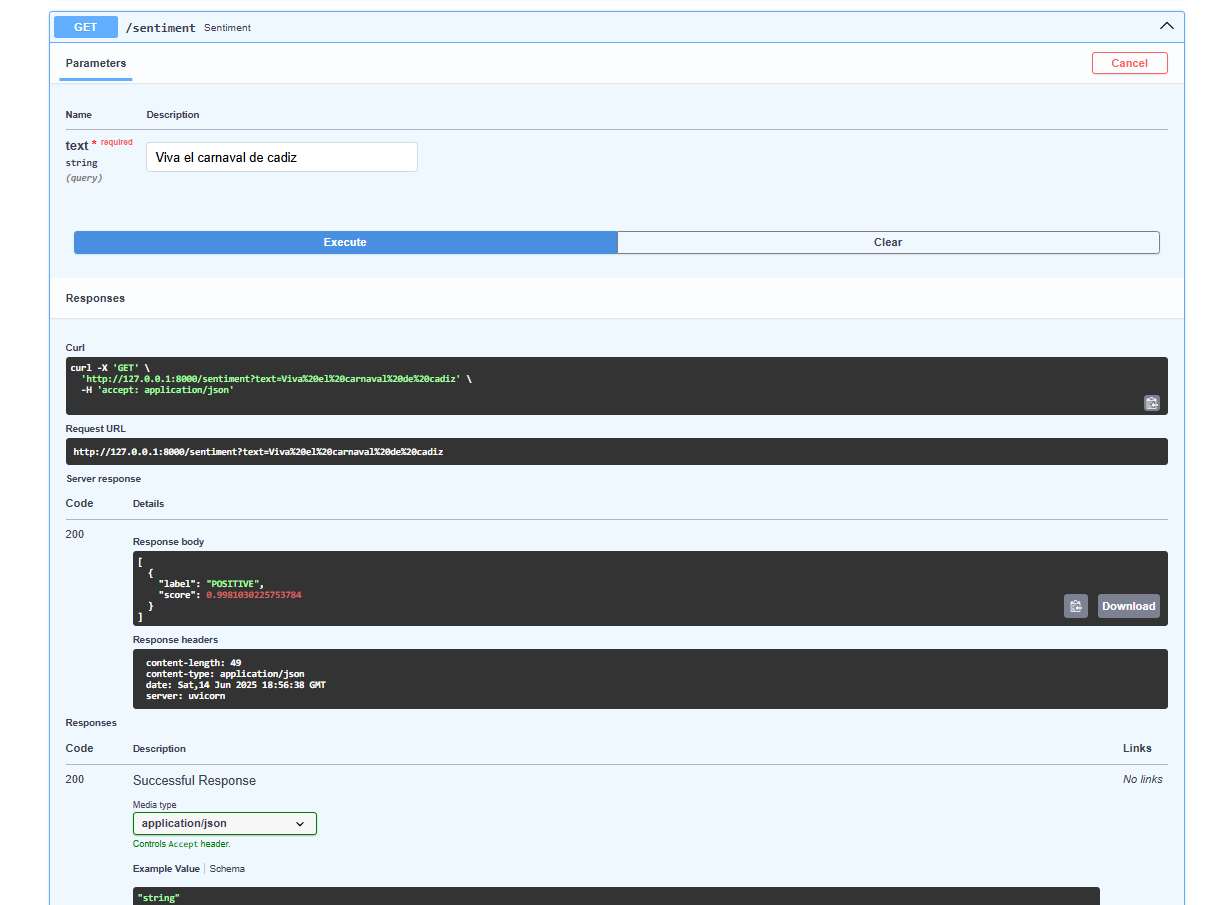

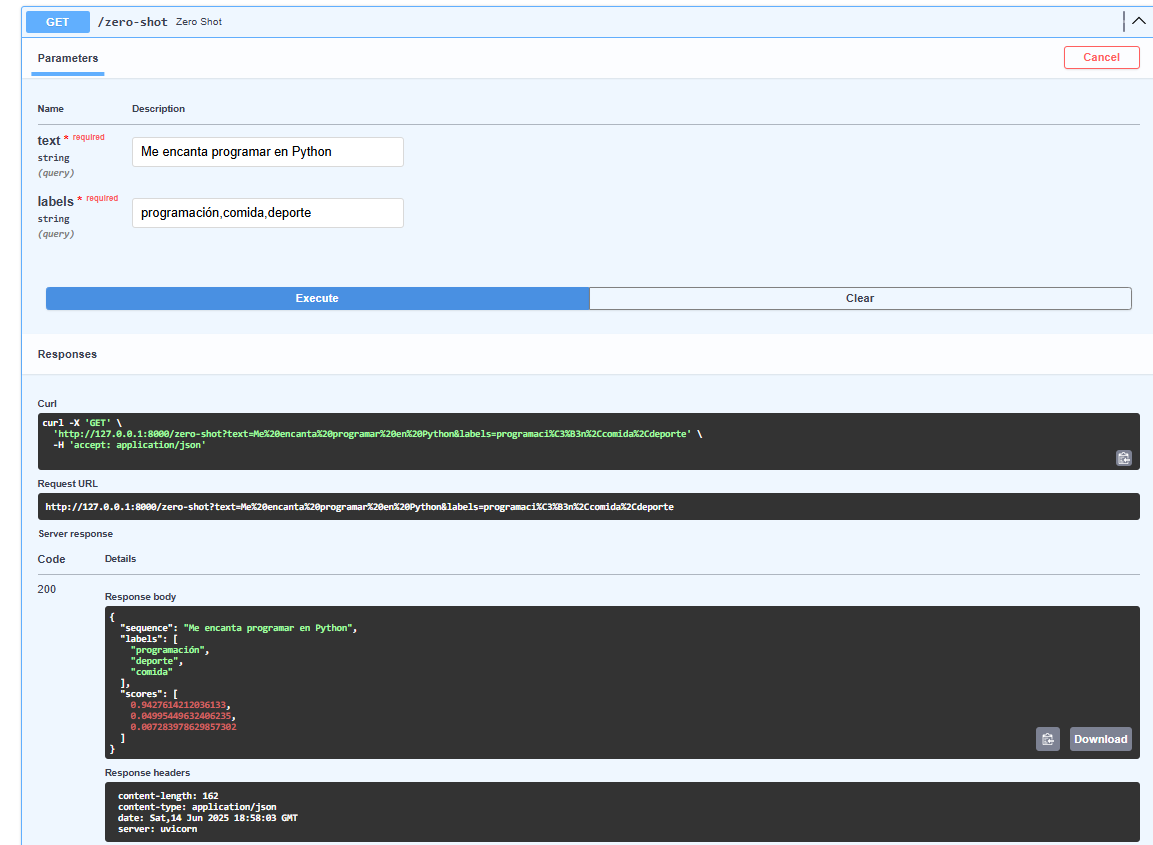